<a href="https://colab.research.google.com/github/Ryanng72/AI/blob/main/cuoiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
trainset='/content/drive/MyDrive/Image/Gender'

In [5]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [6]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 2979 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [7]:
validation_set.class_indices

{'men': 0, 'women': 1}

In [41]:
{'.ipynb_checkpoints': 0,
 'men': 1,
 'women': 2, 
}

{'.ipynb_checkpoints': 0, 'men': 1, 'women': 2}

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
24/24 [==============================] - 815s 33s/step - loss: 2.3787 - accuracy: 0.5492 - val_loss: 0.6826 - val_accuracy: 0.5758
Epoch 2/50
24/24 [==============================] - 466s 19s/step - loss: 0.6762 - accuracy: 0.5737 - val_loss: 0.6549 - val_accuracy: 0.6182
Epoch 3/50
24/24 [==============================] - 468s 19s/step - loss: 0.6549 - accuracy: 0.6120 - val_loss: 0.6193 - val_accuracy: 0.6697
Epoch 4/50
24/24 [==============================] - 468s 19s/step - loss: 0.6467 - accuracy: 0.6368 - val_loss: 0.6268 - val_accuracy: 0.6727
Epoch 5/50
24/24 [==============================] - 472s 19s/step - loss: 0.6391 - accuracy: 0.6459 - val_loss: 0.6147 - val_accuracy: 0.6758
Epoch 6/50
24/24 [==============================] - 470s 19s/step - loss: 0.6395 - accuracy: 0.6395 - val_loss: 0.6201 - val_accuracy: 0.6818
Epoch 7/50
24/24 [==============================] - 471s 19s/step - loss: 0.6296 - accuracy: 0.6532 - val_loss: 0.6188 - val_accuracy: 0.6636
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/genderdetect.h5')


In [10]:
model5 = load_model('/content/drive/MyDrive/genderdetect.h5')

In [37]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 2979 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [61]:
label = ['men','women',]

1/1 [==============================] - 0s 102ms/step
men


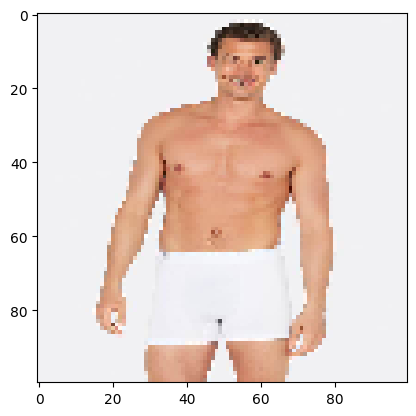

In [56]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Image/Gender/men/00000034.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 57ms/step
women


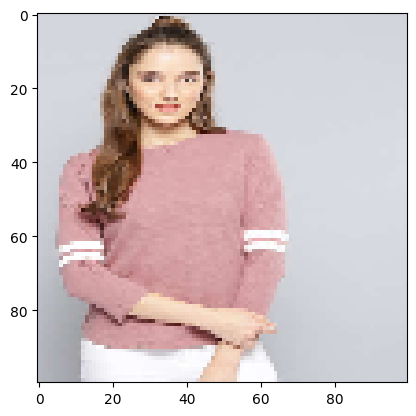

In [64]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/Image/Gender/women/00000020.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

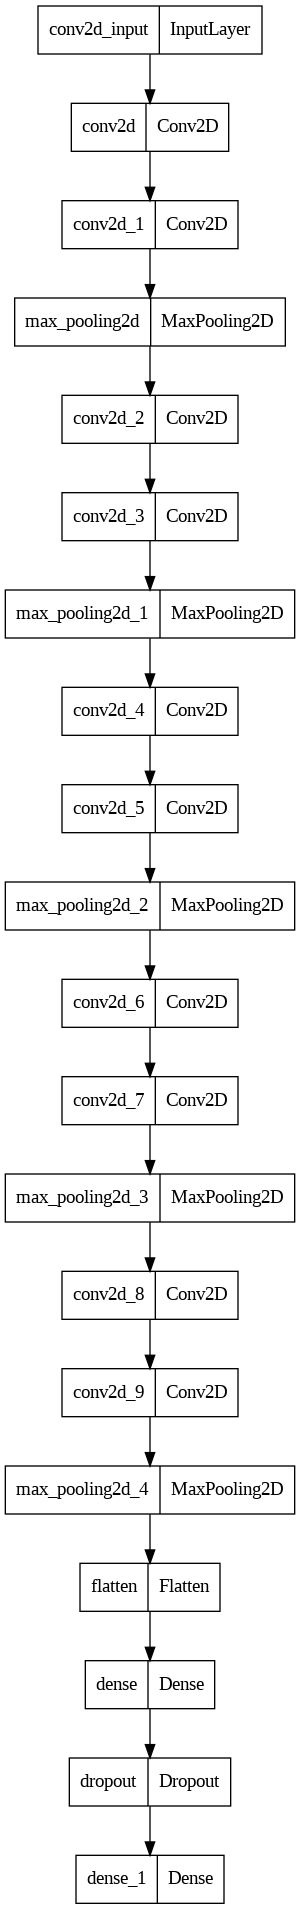

In [65]:
#plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)